KNN - sort data using this method

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

In [72]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
test_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
train_df.shape

(60000, 785)

In [15]:
x = train_df.drop('label',axis = 1)
y = train_df['label']

In [16]:
x_for_testing_data = test_df[:]

2


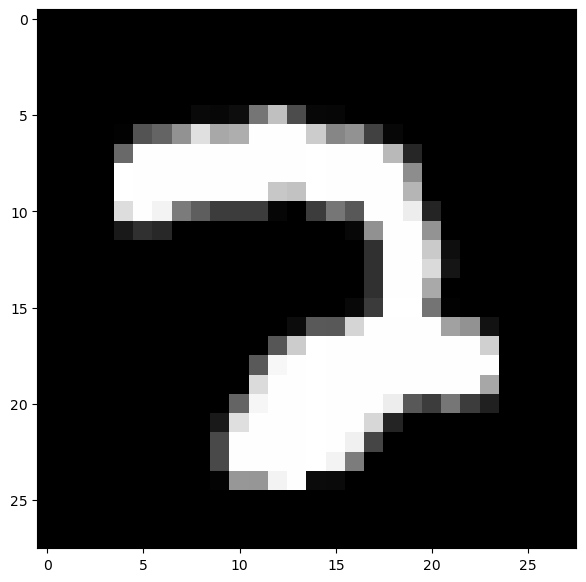

In [23]:
plt.figure(figsize =(7,7))
some_digit = 120
some_digit_image = x.iloc[some_digit].to_numpy().reshape(28,28)
plt.imshow(np.reshape(some_digit_image,(28,28)), cmap=plt.cm.gray)
print(y[some_digit])

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 42)

In [59]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((42000, 784), (42000,), (18000, 784), (18000,))

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train,y_train)
x_train = scaler.transform(x_train)
x_train.shape

(42000, 784)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
y_pred = classifier.predict(x_test)
y_pred

D:\Anakonda\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([7, 3, 8, ..., 5, 0, 0], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score,classification_report
print("----------------------------------------------------------")
print(accuracy_score(y_test,y_pred))
print("----------------------------------------------------------")
print(classification_report(y_test,y_pred))
print("----------------------------------------------------------")


----------------------------------------------------------
0.8108888888888889
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.98      0.75      1805
           1       1.00      0.87      0.93      1994
           2       0.91      0.86      0.89      1759
           3       0.93      0.73      0.82      1846
           4       0.98      0.61      0.75      1726
           5       0.98      0.57      0.72      1653
           6       0.96      0.92      0.94      1787
           7       0.96      0.82      0.89      1937
           8       0.51      0.94      0.66      1730
           9       0.84      0.77      0.80      1763

    accuracy                           0.81     18000
   macro avg       0.87      0.81      0.81     18000
weighted avg       0.87      0.81      0.82     18000

----------------------------------------------------------


In [83]:
df = pd.DataFrame(y_pred, columns=['test_result'])
filename = 'Test_result.csv'
df.to_csv(filename, index=False)